# SCH23390 TFC Analysis

<a id='is'></a>
## Imports and Script-Wide Set Up

In [1]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pingouin as pg
# insert path to fearData.py below
sys.path.insert(0, '../utility_code')
import fearData as fd
%matplotlib inline


In [2]:
# set script-wide plotting settings
fd.presentation_style()
sns.set_palette('Paired')


## Load

In [3]:
df_tone_total = pd.read_csv(
    './data-clean/SCH23390_TFC.csv')


/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<a id='plto'></a>
### Plot Tone Test Data

<Figure size 864x720 with 0 Axes>

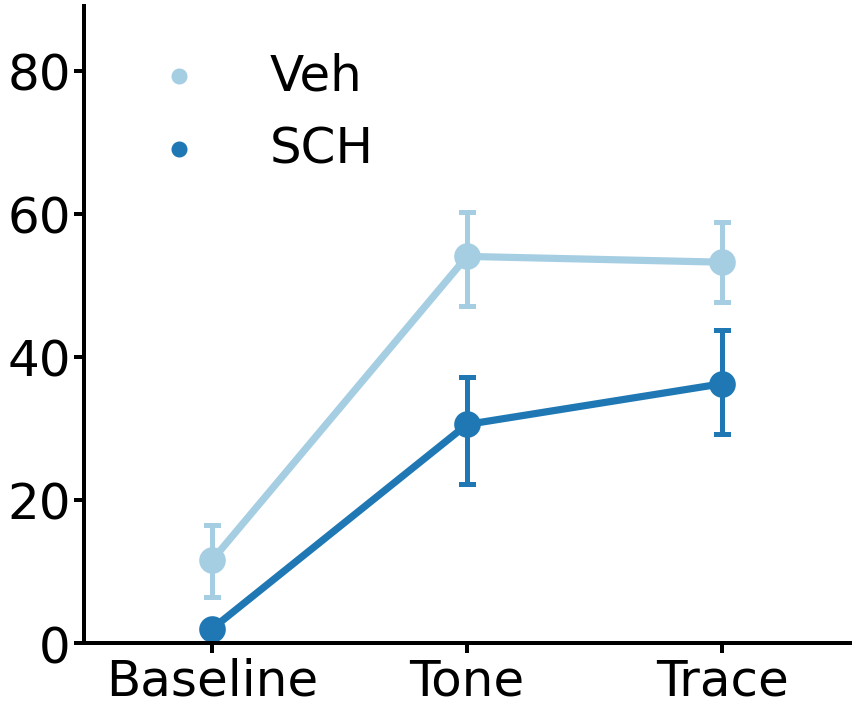

In [4]:
plt.figure(figsize=(12, 10))

fd.tfc_plot(df_tone_total, xvar='Phase', min_bins=False, tone_squares=False, trace_squares=False,
            shock_line=False, hue='Condition', order=['baseline', 'tone', 'trace'], hue_order=['Veh', 'SCH'],
            errwidth=5, scale=1, figsize=(12, 10), marker_size=450)

plt.ylim(0, 89)
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace'])
ax.tick_params(labelsize=50)
L = ax.legend(markerscale=.5, fontsize=50, loc='upper left')

plt.tight_layout()


In [5]:
pg.mixed_anova(data = df_tone_total, dv = 'Pct Component Time Freezing', 
               within = 'Phase', between = 'Condition', subject = 'Animal').round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Condition,3339.392,1,14,3339.392,6.147,0.027,NaN,0.305,NaN,NaN,NaN,NaN
1,Phase,14446.573,2,28,7223.287,33.989,0.000,0.0,0.708,0.601,False,0.337,0.0
2,Interaction,387.715,2,28,193.857,0.912,0.413,NaN,0.061,NaN,NaN,NaN,NaN
